<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


## SVM

In [2]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train)

### sklearn

In [4]:
clf = SVC(gamma=0.001, C=100)
clf.fit(X_train, y_train)
classifier_decisions = clf.decision_function(X_cv)

### Custom

Ex 2: In Linear SVM After traning the models with the optimal weights  𝑤  we get, we will find the value of  𝑠𝑖𝑔𝑛(𝑤𝑥+𝑏) , if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients  𝛼𝑖  we get, we will find the value of  𝑠𝑖𝑔𝑛(∑𝑛𝑖=1(𝑦𝑖𝛼𝑖𝐾(𝑥𝑖,𝑥𝑞))+𝑖𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡) , here  𝐾(𝑥𝑖,𝑥𝑞)  is the RBF kernel. If this value comes out to be -ve we will mark  𝑥𝑞  as negative class, else its positive class.

RBF kernel is defined as:  𝐾(𝑥𝑖,𝑥𝑞)  =  𝑒𝑥𝑝(−𝛾||𝑥𝑖−𝑥𝑞||2) 
For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation

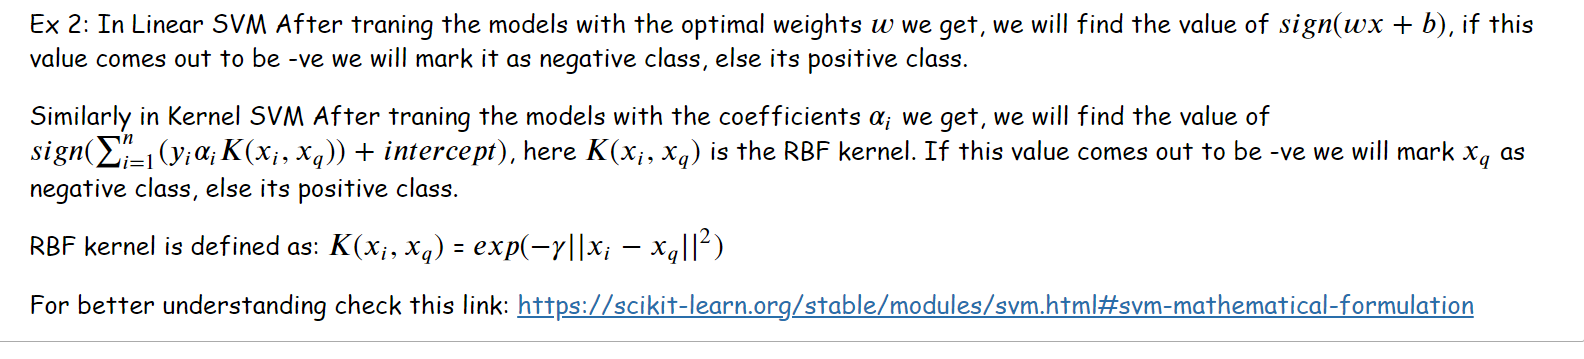

In [5]:
clf = SVC(gamma=0.001, C=100)
clf.fit(X_train, y_train)
sklearn_svm_decision = clf.decision_function(X_cv)

In [6]:
dual_coeff = clf.dual_coef_[0]
sv = clf.support_vectors_
b = clf.intercept_
print(dual_coeff.shape)
print(sv.shape)
print(b)

(553,)
(553, 5)
[2.61444741]


In [7]:
def new_function_SVM(X_cv):
    val = 0
    y_pred = []
    gamma = clf._gamma
    for query in X_cv:
        summ = 0
        for i in range(len(sv)):
            d = np.linalg.norm(sv[i] - query)
            power = np.exp(-gamma*(d**2))
            summ += dual_coeff[i]*power
        val = summ + b
        y_pred.append(val[0])
    return np.array(y_pred)

In [8]:
print(sklearn_svm_decision[:5])
custom_decision_function = new_function_SVM(X_cv)
print(custom_decision_function[:5])

[-2.06171256 -1.81426452 -1.43740855 -2.58234501 -2.92083078]
[-2.06171256 -1.81426452 -1.43740855 -2.58234501 -2.92083078]


<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm


In [9]:
def platt_scaling(y_train, y_cv):
    y_cv_platt = []
    plus = (np.count_nonzero(y_train==1))
    minus = (np.count_nonzero(y_train==0))
    
    y_plus = (plus+1) / (plus+2)
    y_minus = 1 / (minus-2)
    for i in range(len(y_cv)):
        if y_cv[i] == 1:
            y_cv_platt.append(y_plus)
        if y_cv[i] == 0:
            y_cv_platt.append(y_minus)
    return np.array(y_cv_platt)

In [10]:
y_cv_platt = platt_scaling(y_train, y_cv)
print(y_cv_platt[0:5])

[0.00047847 0.00047847 0.00047847 0.00047847 0.00047847]


In [11]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    w = np.zeros_like(dim).astype(int)
    b = 0

    return w,b

def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    sigm = 1 / (1 + np.exp(-z))

    return sigm

def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw = x*(y - sigmoid(np.dot(w.T,x) + b)) - ((alpha*w)).sum() / N

    return dw

def gradient_db(x,y,w,b):
    '''In this function, we will compute gradient w.r.to b '''
    db = y - sigmoid(np.dot(w.T, x) + b)

    return db

def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    sum = 0
    for i in range(len(y_true)):
        sum += (y_true[i] * np.log10(y_pred[i])) + ((1 - y_true[i]) * np.log10(1 - y_pred[i]))
    loss = -1 * (1 / len(y_true)) * sum
    return loss

In [12]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    
    ''' In this function, we will implement logistic regression'''
    #Here eta0 is learning rate
    train_loss = []
    test_loss = []
    w, b = initialize_weights(X_train[0])
    for i in range(epochs):
        train_pred = []
        test_pred = []
        for x, y in zip(X_train, y_train):
            dw = gradient_dw(x, y,w,b,alpha,N)
            db = gradient_db(x, y,w,b)
            w = w + (eta0 * dw)
            b = b + (eta0 * db)
        for val1 in X_train:
            train_pred.append(sigmoid(np.dot(w, val1) + b))
            
        loss1 = logloss(y_train, train_pred)
        train_loss.append(loss1)
            
        for val in X_test:
            test_pred.append(sigmoid(np.dot(w, val) + b))
            
        loss2 = logloss(y_test, test_pred)
        test_loss.append(loss2)
        
    return w,b,train_loss,test_loss     

In [13]:
alpha=0.0001
eta0=0.0001
N=len(X_train)
epochs=50
w ,b, train_loss, test_loss=train(custom_decision_function, y_cv_platt, X_test,y_test,epochs,alpha,eta0)

In [14]:
print(w)
print(b)

1.1646067059676375
-0.11231855762607144


<function matplotlib.pyplot.show(close=None, block=None)>

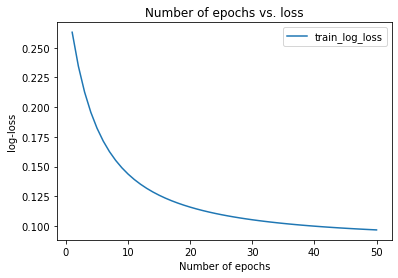

In [15]:
from matplotlib import pyplot as plt
epoch = [i for i in range(1,51,1)]

plt.plot(epoch, train_loss , label='train_log_loss')
# plt.plot(epoch, test_loss, label='test_log_loss')
plt.xlabel("Number of epochs")
plt.ylabel("log-loss")
plt.title('Number of epochs vs. loss')
plt.legend()
plt.show

In [16]:
f_test = clf.decision_function(X_test)

In [17]:
probabilities = []
for xq in f_test:
    temp = 1/(1+np.exp(-w*xq-b))
    probabilities.append(temp)
    
probabilities

[0.9079794372592804,
 0.29629045437883333,
 0.5456051714780301,
 0.8251537990538113,
 0.021244228991604223,
 0.9766872293985424,
 0.025440838927207055,
 0.47888947364725004,
 0.8618812110182635,
 0.9170717473817132,
 0.05636069788304095,
 0.049547704523009384,
 0.027668107816694962,
 0.09597721263835428,
 0.01598192351229934,
 0.103105074742801,
 0.05256262016485183,
 0.0051566038643177485,
 0.2606313610820535,
 0.060751255901474586,
 0.9117634643169366,
 0.014063321550027147,
 0.014047003696410196,
 0.05649423274935724,
 0.6501621015167712,
 0.6965826971271277,
 0.2753373430133526,
 0.8771841412561153,
 0.05976682938278839,
 0.03694052387291701,
 0.031006205046925448,
 0.1064673914724754,
 0.24807732043018027,
 0.027813953205827958,
 0.031196070265445828,
 0.8798608736206198,
 0.5641317206775018,
 0.022237661618200007,
 0.7440091677067346,
 0.2569615673597721,
 0.7855300658930267,
 0.003190202749128285,
 0.19817566488318447,
 0.01748615614991495,
 0.6008561206307366,
 0.07663260490173